In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import scipy.optimize
from matplotlib import rcParams
rcParams['figure.figsize'] = [12, 8]
rcParams.update({'font.size': 18})

(-0.5, 1427.5, 1369.5, -0.5)

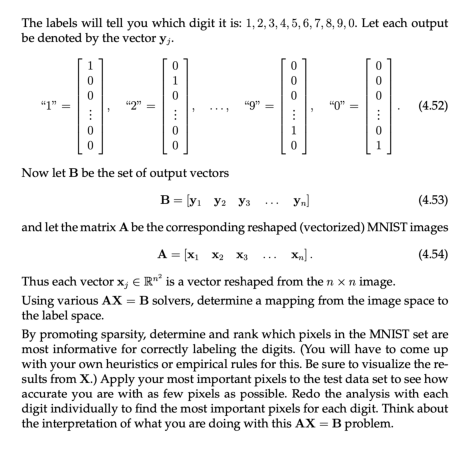

In [2]:
A = imread('4.4.png')
plt.imshow(A)
plt.axis('off')

In [3]:
import idx2numpy

In [4]:
train_images= idx2numpy.convert_from_file('train-images.idx3-ubyte')
train_labels = idx2numpy.convert_from_file('train-labels.idx1-ubyte')
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [5]:
train_images = train_images.reshape(60000, 784)

In [6]:
num_classes = 10

# Create an empty array to hold the one-hot encoded labels
one_hot_labels = np.zeros((len(train_labels), num_classes))

# Set the appropriate element in each row to 1 based on the label
for i in range(len(train_labels)):
    one_hot_labels[i, train_labels[i]] = 1

## Solving AX = B

from scipy.optimize import minimize
def two_norm(x):
    return np.linalg.norm(x,ord=2)
def one_norm(x):
    return np.linalg.norm(x,ord=1)

def constraint_function(x):
    return np.dot(train_images, x) - train_labels

constr = ({'type': 'eq', 'fun': lambda x: train_images@ x - train_labels}) 
x0 = np.random.rand(784, 10)
res = minimize(two_norm, x0, method='SLSQP',constraints=constr)
x2 = res.x
res = minimize(one_norm, x0, method='SLSQP',constraints=constr)
x1 = res.x

In [8]:
x_pinv = np.linalg.pinv(train_images).dot(train_labels)

In [9]:
from sklearn.linear_model import Ridge


ridge = Ridge(alpha=1.0)  # Adjust the alpha (regularization strength) as needed
ridge.fit(train_images, train_labels)
x_ridge = ridge.coef_


In [10]:
from sklearn.linear_model import Lasso



lasso = Lasso(alpha=1.0)  # Adjust the alpha (regularization strength) as needed
lasso.fit(train_images, train_labels)
x_lasso = lasso.coef_


In [11]:
import numpy as np
import statsmodels.api as sm


model = sm.RLM(train_labels, train_images, M=sm.robust.norms.HuberT())  # Use the HuberT estimator or another robust estimator
results = model.fit()
x_robust = results.params


## Visualizing X 

In [12]:
print(x_robust.shape)

(784,)


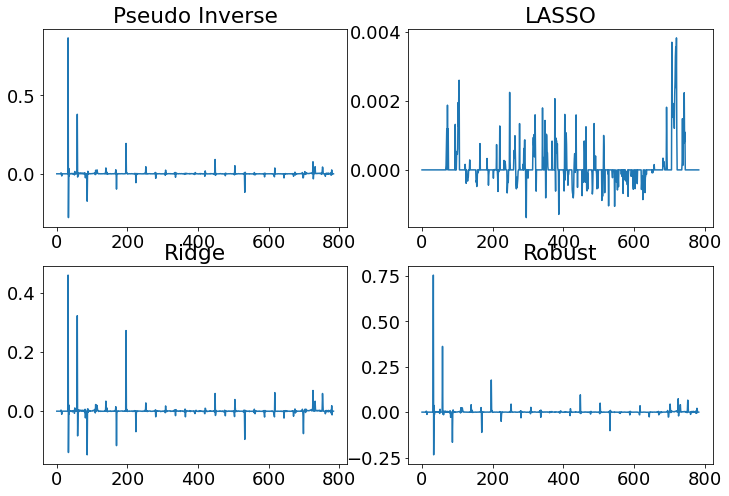

In [13]:
fig, axes = plt.subplots(2, 2)
axes[0, 0].plot(x_pinv)
axes[0, 0].set_title('Pseudo Inverse')
axes[0, 1].plot(x_lasso)
axes[0, 1].set_title('LASSO')
axes[1, 0].plot(x_ridge)
axes[1, 0].set_title('Ridge')
axes[1, 1].plot(x_robust)
axes[1, 1].set_title('Robust')
plt.show()

In [14]:
print(784- np.count_nonzero(x_pinv))

14


In [15]:
print(784- np.count_nonzero(x_lasso))

550


In [16]:
print(784- np.count_nonzero(x_ridge))

67


In [17]:
print(784- np.count_nonzero(x_robust))

14
